In [1]:
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"
def plot_data(pl, X, y):
        # plot class where y==0
    pl.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    # plot class where y==1
    pl.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    pl.legend(['0', '1'])
    return pl
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    # make prediction with the model and reshape the output so contourf can plot it
    c = model.predict(ab)
    Z = c.reshape(aa.shape)
    
    plt.figure(figsize=(12, 8))
    # plot the contour
    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
    # plot the moons of data
    plot_data(plt, X, y)
    
    return plt
X, y = make_circles(n_samples=1000, factor=.6, noise=0.1, random_state=42)
pl = plot_data(plt, X, y)
pl.show()

<Figure size 640x480 with 1 Axes>

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [5]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation="tanh"))
model.add(Dense(4, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))

In [6]:
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
700/700 [==============================] - 0s 134us/step - loss: 0.6909 - accuracy: 0.5443
Epoch 2/100
700/700 [==============================] - 0s 22us/step - loss: 0.6396 - accuracy: 0.7000
Epoch 3/100
700/700 [==============================] - 0s 45us/step - loss: 0.4871 - accuracy: 0.8486
Epoch 4/100
700/700 [==============================] - 0s 22us/step - loss: 0.3259 - accuracy: 0.9086
Epoch 5/100
700/700 [==============================] - 0s 45us/step - loss: 0.2341 - accuracy: 0.9414
Epoch 6/100
700/700 [==============================] - 0s 22us/step - loss: 0.1713 - accuracy: 0.9500
Epoch 7/100
700/700 [==============================] - 0s 22us/step - loss: 0.1466 - accuracy: 0.9571
Epoch 8/100
700/700 [==============================] - 0s 22us/step - loss: 0.1154 - accuracy: 0.9657
Epoch 9/100
700/700 [==============================] - 0s 22us/step - loss: 0.1186 - accuracy: 0.9600
Epoch 10/100
700/700 [==============================] - 0s 22us/step - loss: 0.12

700/700 [==============================] - 0s 22us/step - loss: 0.0837 - accuracy: 0.9686
Epoch 81/100
700/700 [==============================] - 0s 22us/step - loss: 0.0822 - accuracy: 0.9700
Epoch 82/100
700/700 [==============================] - 0s 22us/step - loss: 0.0766 - accuracy: 0.9700
Epoch 83/100
700/700 [==============================] - 0s 45us/step - loss: 0.0621 - accuracy: 0.9757
Epoch 84/100
700/700 [==============================] - 0s 22us/step - loss: 0.0510 - accuracy: 0.9843
Epoch 85/100
700/700 [==============================] - 0s 22us/step - loss: 0.0538 - accuracy: 0.9800
Epoch 86/100
700/700 [==============================] - 0s 22us/step - loss: 0.0745 - accuracy: 0.9700
Epoch 87/100
700/700 [==============================] - 0s 45us/step - loss: 0.0782 - accuracy: 0.9714
Epoch 88/100
700/700 [==============================] - 0s 22us/step - loss: 0.0654 - accuracy: 0.9743
Epoch 89/100
700/700 [==============================] - 0s 22us/step - loss: 0.0610 - 

In [8]:
eval_result = model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 52us/step


In [9]:
print("\n\nTest loss:", eval_result[0], "Test accuracy:", eval_result[1])



Test loss: 0.12189123469094436 Test accuracy: 0.95333331823349


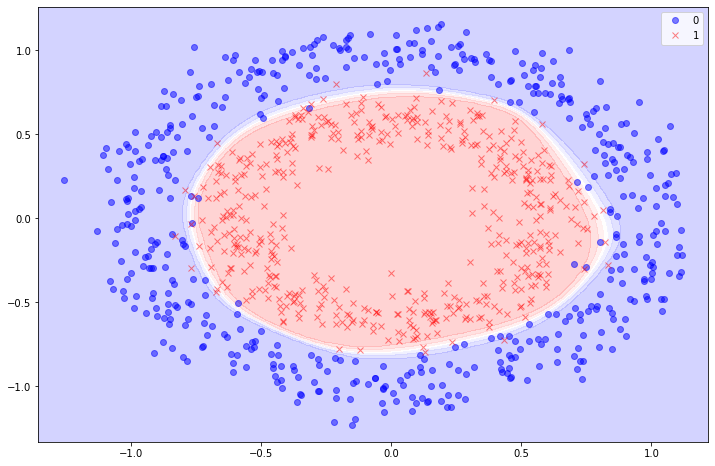

In [10]:
plot_decision_boundary(model, X, y).show()